## कार्टपोल स्केटिङ

> **समस्या**: यदि पिटरले ब्वाँसोबाट भाग्न चाहन्छ भने, उसले ब्वाँसोभन्दा छिटो चल्न सक्नुपर्छ। हामी हेर्नेछौं कि पिटरले स्केटिङ सिक्न कसरी सक्छ, विशेष गरी सन्तुलन कायम राख्न, Q-लर्निङ प्रयोग गरेर।

पहिले, gym स्थापना गरौं र आवश्यक लाइब्रेरीहरू आयात गरौं:


In [1]:
import sys
!pip install gym 

import gym
import matplotlib.pyplot as plt
import numpy as np
import random

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


## कार्टपोल वातावरण सिर्जना गर्नुहोस्


In [2]:
env = gym.make("CartPole-v1")
print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
0


पर्यावरण कसरी काम गर्छ भनेर हेर्नको लागि, आउनुहोस् १०० चरणहरूको लागि छोटो सिमुलेशन चलाउँ।


In [3]:
env.reset()

for i in range(100):
   env.render()
   env.step(env.action_space.sample())
env.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


सिमुलेशनको क्रममा, हामीले कसरी कार्य गर्ने निर्णय गर्नको लागि अवलोकनहरू प्राप्त गर्न आवश्यक छ। वास्तवमा, `step` फङ्सनले हामीलाई हालको अवलोकनहरू, पुरस्कार फङ्सन, र `done` फ्ल्याग फिर्ता दिन्छ जसले सिमुलेशन जारी राख्ने अर्थ छ कि छैन भनेर संकेत गर्दछ:


In [4]:
env.reset()

done = False
while not done:
   env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   print(f"{obs} -> {rew}")
env.close()

[ 0.03044442 -0.19543914 -0.04496216  0.28125618] -> 1.0
[ 0.02653564 -0.38989186 -0.03933704  0.55942606] -> 1.0
[ 0.0187378  -0.19424049 -0.02814852  0.25461393] -> 1.0
[ 0.01485299 -0.38894946 -0.02305624  0.53828712] -> 1.0
[ 0.007074   -0.19351108 -0.0122905   0.23842953] -> 1.0
[ 0.00320378  0.00178427 -0.00752191 -0.05810469] -> 1.0
[ 0.00323946  0.19701326 -0.008684   -0.35315131] -> 1.0
[ 0.00717973  0.00201587 -0.01574703 -0.06321931] -> 1.0
[ 0.00722005  0.19736001 -0.01701141 -0.36082863] -> 1.0
[ 0.01116725  0.39271958 -0.02422798 -0.65882671] -> 1.0
[ 0.01902164  0.19794307 -0.03740452 -0.37387001] -> 1.0
[ 0.0229805   0.39357584 -0.04488192 -0.67810827] -> 1.0
[ 0.03085202  0.58929164 -0.05844408 -0.98457719] -> 1.0
[ 0.04263785  0.78514572 -0.07813563 -1.2950295 ] -> 1.0
[ 0.05834076  0.98116859 -0.10403622 -1.61111521] -> 1.0
[ 0.07796413  0.78741784 -0.13625852 -1.35259196] -> 1.0
[ 0.09371249  0.98396202 -0.16331036 -1.68461179] -> 1.0
[ 0.11339173  0.79106371 -0.197

हामी ती संख्याहरूको न्यूनतम र अधिकतम मान प्राप्त गर्न सक्छौं:


In [5]:
print(env.observation_space.low)
print(env.observation_space.high)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
def discretize(x):
    return tuple((x/np.array([0.25, 0.25, 0.01, 0.1])).astype(np.int))

अन्य बिनहरू प्रयोग गरेर विविक्तकरण विधि पनि अन्वेषण गरौं:


In [7]:
def create_bins(i,num):
    return np.arange(num+1)*(i[1]-i[0])/num+i[0]

print("Sample bins for interval (-5,5) with 10 bins\n",create_bins((-5,5),10))

ints = [(-5,5),(-2,2),(-0.5,0.5),(-2,2)] # intervals of values for each parameter
nbins = [20,20,10,10] # number of bins for each parameter
bins = [create_bins(ints[i],nbins[i]) for i in range(4)]

def discretize_bins(x):
    return tuple(np.digitize(x[i],bins[i]) for i in range(4))

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


अब एउटा छोटो सिमुलेशन चलाउँ र ती छुट्टै वातावरण मानहरू अवलोकन गरौं।


In [8]:
env.reset()

done = False
while not done:
   #env.render()
   obs, rew, done, info = env.step(env.action_space.sample())
   #print(discretize_bins(obs))
   print(discretize(obs))
env.close()

(0, 0, -1, -3)
(0, 0, -2, 0)
(0, 0, -2, -3)
(0, 1, -3, -6)
(0, 2, -4, -9)
(0, 3, -6, -12)
(0, 2, -8, -9)
(0, 3, -10, -13)
(0, 4, -13, -16)
(0, 4, -16, -19)
(0, 4, -20, -17)
(0, 4, -24, -20)


In [9]:
Q = {}
actions = (0,1)

def qvalues(state):
    return [Q.get((state,a),0) for a in actions]

In [10]:
# hyperparameters
alpha = 0.3
gamma = 0.9
epsilon = 0.90

In [11]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

Qmax = 0
cum_rewards = []
rewards = []
for epoch in range(100000):
    obs = env.reset()
    done = False
    cum_reward=0
    # == do the simulation ==
    while not done:
        s = discretize(obs)
        if random.random()<epsilon:
            # exploitation - chose the action according to Q-Table probabilities
            v = probs(np.array(qvalues(s)))
            a = random.choices(actions,weights=v)[0]
        else:
            # exploration - randomly chose the action
            a = np.random.randint(env.action_space.n)

        obs, rew, done, info = env.step(a)
        cum_reward+=rew
        ns = discretize(obs)
        Q[(s,a)] = (1 - alpha) * Q.get((s,a),0) + alpha * (rew + gamma * max(qvalues(ns)))
    cum_rewards.append(cum_reward)
    rewards.append(cum_reward)
    # == Periodically print results and calculate average reward ==
    if epoch%5000==0:
        print(f"{epoch}: {np.average(cum_rewards)}, alpha={alpha}, epsilon={epsilon}")
        if np.average(cum_rewards) > Qmax:
            Qmax = np.average(cum_rewards)
            Qbest = Q
        cum_rewards=[]

0: 108.0, alpha=0.3, epsilon=0.9


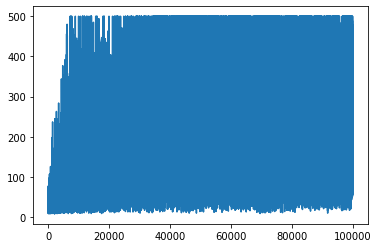

In [20]:
plt.plot(rewards)

यस ग्राफबाट केही भन्न सम्भव छैन, किनभने स्टोकास्टिक प्रशिक्षण प्रक्रियाको प्रकृतिका कारण प्रशिक्षण सत्रहरूको अवधि धेरै फरक हुन्छ। यस ग्राफलाई अझ बुझ्नको लागि, हामी प्रयोगहरूको श्रृंखलामा **चलिरहेको औसत** गणना गर्न सक्छौं, मानौं १००। यो सजिलैसँग `np.convolve` प्रयोग गरेर गर्न सकिन्छ:


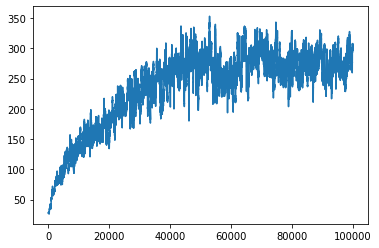

In [22]:
def running_average(x,window):
    return np.convolve(x,np.ones(window)/window,mode='valid')

plt.plot(running_average(rewards,100))

## हाइपरप्यारामिटरहरू परिवर्तन गर्दै र परिणामलाई क्रियामा हेर्दै

अब यो वास्तवमै रोचक हुनेछ कि प्रशिक्षित मोडेल कसरी व्यवहार गर्छ भनेर हेर्न। आउनुहोस् सिमुलेशन चलाउँ, र हामी प्रशिक्षणको समयमा जस्तै कार्य चयन रणनीतिलाई पछ्याउनेछौं: Q-Table मा सम्भाव्यता वितरण अनुसार नमूना लिने।


In [23]:
obs = env.reset()
done = False
while not done:
   s = discretize(obs)
   env.render()
   v = probs(np.array(qvalues(s)))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
env.close()

## नतिजा एनिमेटेड GIF मा बचत गर्दै

यदि तपाईं आफ्नो साथीहरूलाई प्रभावित गर्न चाहनुहुन्छ भने, तपाईंले सन्तुलन पोलको एनिमेटेड GIF चित्र पठाउन चाहनुहुन्छ। यसका लागि, हामी `env.render` प्रयोग गरेर तस्बिर फ्रेम उत्पादन गर्न सक्छौं, र त्यसपछि ती फ्रेमहरूलाई PIL लाइब्रेरी प्रयोग गरेर एनिमेटेड GIF मा बचत गर्न सक्छौं:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**अस्वीकरण**:  
यो दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) प्रयोग गरी अनुवाद गरिएको हो। हामी यथासम्भव सटीकता सुनिश्चित गर्न प्रयास गर्छौं, तर कृपया ध्यान दिनुहोस् कि स्वचालित अनुवादहरूमा त्रुटि वा अशुद्धि हुन सक्छ। यसको मूल भाषामा रहेको मूल दस्तावेज़लाई आधिकारिक स्रोत मानिनुपर्छ। महत्त्वपूर्ण जानकारीका लागि, व्यावसायिक मानव अनुवाद सिफारिस गरिन्छ। यस अनुवादको प्रयोगबाट उत्पन्न हुने कुनै पनि गलतफहमी वा गलत व्याख्याका लागि हामी जिम्मेवार हुने छैनौं।  
